In [1]:
from Space_transformation import hough
import matplotlib.pyplot as plt
import cv2

149


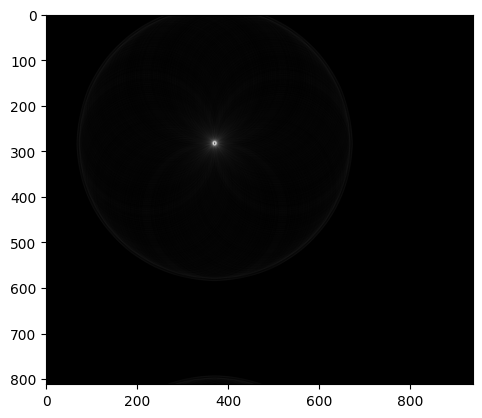

In [2]:
if __name__ == "__main__":
    image = cv2.imread("prueba.png")
    houghImage = hough.houghTrasnform_circles(image,0.2,150)
    plt.imshow(houghImage,cmap="gray")
    plt.show()